<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Vis%C3%A3o%20Computacional/Aula%2002%20-%20Filtros%20e%20Extra%C3%A7%C3%A3o%20de%20Caracter%C3%ADsticas/Aula_02_Segmenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [12]:
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip -O Images.zip
!unzip -o Images.zip

--2022-10-01 13:22:22--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip [following]
--2022-10-01 13:22:23--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3413100 (3.3M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>]   3

#Segmentação de Caracteres de Placa
  Recortar e Classificar os caracteres de uma placa


*   A-Z
*   0-9




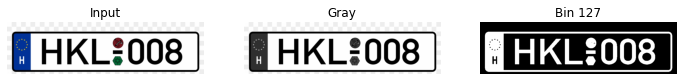

In [45]:
#read image from disk
img_plate = cv2.imread('Images/placa5.png')
#converts to rgb to better visualize
img_plate = cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB)


grayscale = cv2.cvtColor(img_plate,cv2.COLOR_RGB2GRAY)


#Threshold opencv
thresh_val = 127
_, binary = cv2.threshold(grayscale,thresh_val,255,cv2.THRESH_BINARY_INV)

#threshold por slice
binary = grayscale.copy()
binary[grayscale >= thresh_val] = 0
binary[grayscale < thresh_val] = 255


plot_sidebyside([img_plate,grayscale,binary],['Input','Gray','Bin 127'],colormap='gray')

#Detecção de Componentes Conexos - Algoritmo clássico
* Analisa a vizinhança do pixel diferente de zero (primeiro plano)
* Rotula cada pixel conectado (1,2,3,4….)

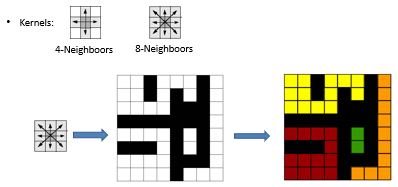

O método é implementado pela função cv2.connectedComponent()




#Pré-Processamento

Primeiro, devemos binarizar a imagem entre primeiro plano e o plano de fundo.
   * Desfoque para normalizar brilho e reduzir ruídos
   * Otsu para binarizar

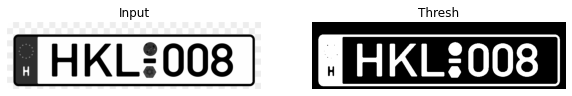

In [48]:
gray = cv2.cvtColor(img_plate,cv2.COLOR_RGB2GRAY)

gray = cv2.medianBlur(gray,5)

_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plot_sidebyside([gray,thresh],['Input','Thresh'],colormap='gray',figsize=(10,6))

#Função cv2.connectedComponent()
* Retorna o número de rótulos encontrados
* Imagem rotulada (1,2,3,4...)
* Lista de propriedades dos componentes (canto superior esquerdo, tamanho, área, etc.)



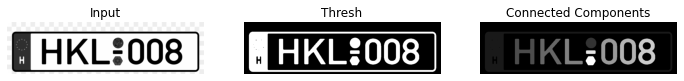

Total Labels: 11
[ 0  1  2  3  4  5  6  7  8  9 10]
(220, 840)
[     0      0    840    220 130811]
[   21    41   799   170 25684]
[ 451   66   45   45 1597]
[ 149   71   83  108 4581]
[ 257   71   91  108 4522]
[ 362   71   76  108 2802]
[ 517   70   68  110 4207]
[ 597   70   68  110 4156]
[ 675   70   72  110 4592]
[452 120  41  15 603]
[ 451  145   42   38 1245]


In [55]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)

plot_sidebyside([gray,thresh,cc_image],['Input','Thresh','Connected Components'],colormap='gray')

print('Total Labels:', num_labels)
print(np.unique(cc_image))

print(cc_image.shape)
for stat in stats:
  print(stat)

[     0      0    840    220 130811]


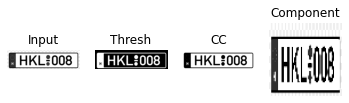

[   21    41   799   170 25684]


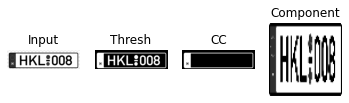

[ 451   66   45   45 1597]


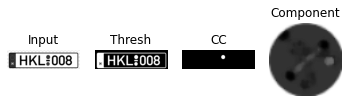

[ 149   71   83  108 4581]


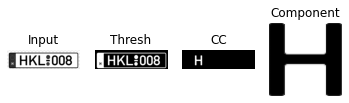

[ 257   71   91  108 4522]


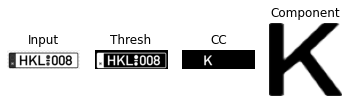

[ 362   71   76  108 2802]


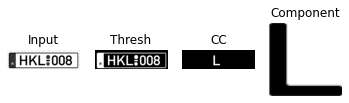

[ 517   70   68  110 4207]


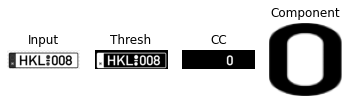

[ 597   70   68  110 4156]


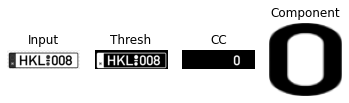

[ 675   70   72  110 4592]


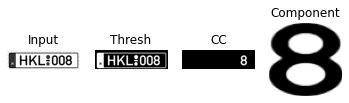

[452 120  41  15 603]


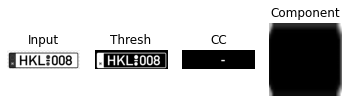

[ 451  145   42   38 1245]


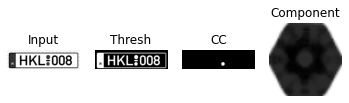

In [56]:
for i in range(num_labels):
  temp = cc_image.copy()
  
  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  print(stats[i])
  x,y,w,h = stats[i][:4]
  area = stats[i][4]
  cx,cy = centroids[i]
  component = gray[y:y+h, x:x+w]
  component = cv2.resize(component,(64,64))    
  plot_sidebyside([gray,thresh,temp,component],['Input','Thresh','CC','Component'],colormap='gray',figsize=(6,6))

#Filtrando componentes por tamanho
Podemos observar que caracteres e números tem um padrão de tamanho (~110 pixels de altura) que permite filtra-los dentre os outros componentes.

Vamos dar uma olhada!

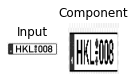

840 220


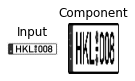

799 170


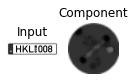

45 45


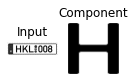

83 108


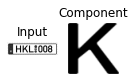

91 108


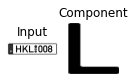

76 108


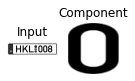

68 110


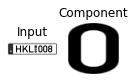

68 110


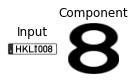

72 110


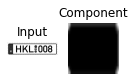

41 15


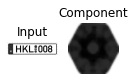

42 38


In [17]:
for i in range(num_labels):
  temp = cc_image.copy()
  
  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  #x,y = top-left coordinates
  #w,h = width and height of bounding box
  x,y,w,h = stats[i][:4]

  #number of foreground pixels
  area = stats[i][4]

  #center of mass (cx,cy)
  cx,cy = centroids[i]
          
  component = gray[y:y+h, x:x+w]
  component = cv2.resize(component,(64,64))    
  plot_sidebyside([gray,component],['Input','Component'],colormap='gray',figsize=(2,2))
  print(w,h)

Adicionamos um 'if' para filtrar apenas as letras e números

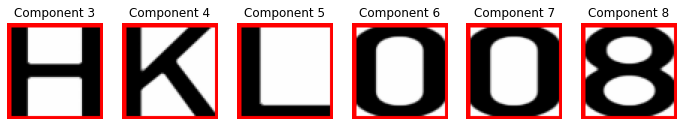

In [18]:
comp_img = []
comp_str = []

for i in range(num_labels):
  temp = cc_image.copy()
  
  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  x,y,w,h = stats[i][:4]
  area = stats[i][4]
  cx,cy = centroids[i]

 
  if h > 90 and h < 130:
    component = gray[y:y+h, x:x+w]
    h,w = component.shape
    
    component = cv2.resize(component,(64,64))  
    component = cv2.cvtColor(component,cv2.COLOR_GRAY2BGR)      
    cv2.rectangle(component,(0,0),(64,64),(255,0,0),thickness=3)    
    comp_img.append(component)
    comp_str.append('Component ' + str(i))

  
plot_sidebyside(comp_img,comp_str,colormap='gray')
    
    

Agora cabe a você! Tente esta abordagem para as outras placas.

* Desafio 01: Implementar um algoritmo que funcione para a maioria das placas. Você precisará lidar com normalização de tamanho, redução de ruído, etc.

* Desafio 02: Desafio de Classificação: Como podemos determinar o caractere?

    **DICA**: Tente implementar uma abordagem que calcule uma diferença de imagem para um conjunto de dados de referência de caractere! O mais próximo é a classe do caractere ou número. Além disso, procure a técnica de Template Matching e descubra como você pode aplicá-la para esse fim.

> O raciocínio é criar um conjunto de dados com todos os caracteres, comumente chamado de 'conjunto de dados de referência'. É fácil, pois você pode desenhá-los usando a função cv2.puttext.
> Então, para cada caractere extraído da placa, você pode compará-lo com o conjunto de referência. O mais próximo determinará o rótulo.

Link para conjunto de dados:!

https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip




In [76]:
!wget https://github.com/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip?raw=true -O dataset.zip
!unzip dataset.zip


--2022-10-01 14:33:27--  https://github.com/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip [following]
--2022-10-01 14:33:28--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip [following]
--2022-10-01 14:33:28--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.z

In [77]:
import glob
image_list = glob.glob('/content/dataset/*.jpg')
print(image_list)

['/content/dataset/aaaa111.jpg', '/content/dataset/mdt5157.jpg', '/content/dataset/mgx1234.jpg', '/content/dataset/fck469.jpg', '/content/dataset/rudcn890.jpg', '/content/dataset/fd2107h.jpg', '/content/dataset/abgap33.jpg', '/content/dataset/spr911.jpg', '/content/dataset/bq-708-gp.jpg', '/content/dataset/ancl550.jpg', '/content/dataset/hrod819.jpg', '/content/dataset/ksc124.jpg', '/content/dataset/vu99.jpg', '/content/dataset/anal334.jpg', '/content/dataset/ina6310.jpg', '/content/dataset/wobav151.jpg', '/content/dataset/smb2078.jpg', '/content/dataset/aba1234.jpg', '/content/dataset/hhrd41.jpg', '/content/dataset/suff170.jpg', '/content/dataset/bmw6220.jpg', '/content/dataset/wudy993.jpg', '/content/dataset/gaj169.jpg', '/content/dataset/hgaa7034.jpg', '/content/dataset/smb2062.jpg', '/content/dataset/aaaa000.jpg', '/content/dataset/la5079.jpg', '/content/dataset/smc1735.jpg', '/content/dataset/map7563.jpg', '/content/dataset/es344.jpg', '/content/dataset/bn158-58.jpg', '/content/da

/content/dataset/aaaa111.jpg


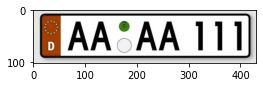

/content/dataset/mdt5157.jpg


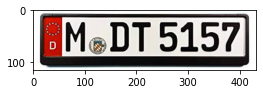

/content/dataset/mgx1234.jpg


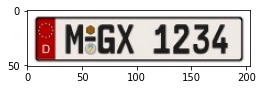

/content/dataset/fck469.jpg


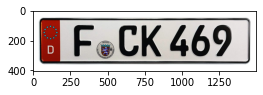

/content/dataset/rudcn890.jpg


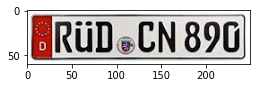

/content/dataset/fd2107h.jpg


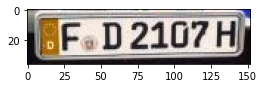

/content/dataset/abgap33.jpg


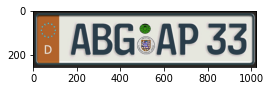

/content/dataset/spr911.jpg


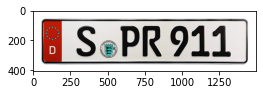

/content/dataset/bq-708-gp.jpg


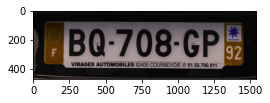

/content/dataset/ancl550.jpg


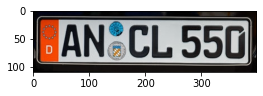

/content/dataset/hrod819.jpg


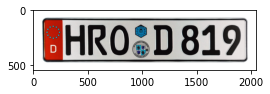

/content/dataset/ksc124.jpg


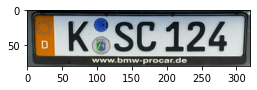

/content/dataset/vu99.jpg


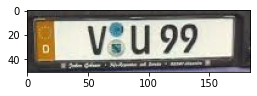

/content/dataset/anal334.jpg


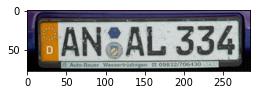

/content/dataset/ina6310.jpg


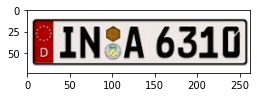

/content/dataset/wobav151.jpg


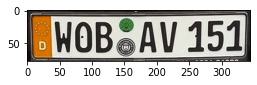

/content/dataset/smb2078.jpg


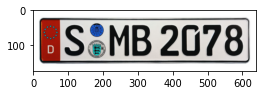

/content/dataset/aba1234.jpg


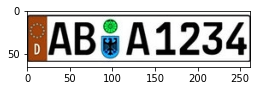

/content/dataset/hhrd41.jpg


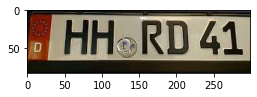

/content/dataset/suff170.jpg


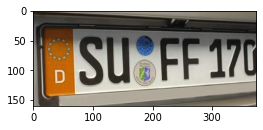

/content/dataset/bmw6220.jpg


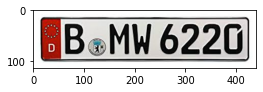

/content/dataset/wudy993.jpg


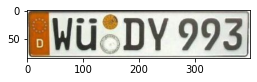

/content/dataset/gaj169.jpg


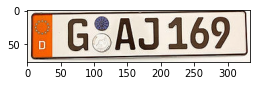

/content/dataset/hgaa7034.jpg


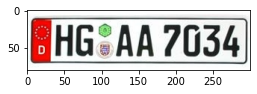

/content/dataset/smb2062.jpg


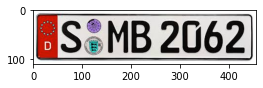

/content/dataset/aaaa000.jpg


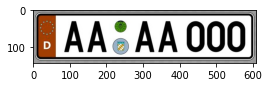

/content/dataset/la5079.jpg


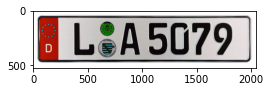

/content/dataset/smc1735.jpg


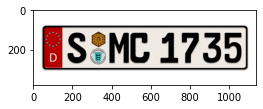

/content/dataset/map7563.jpg


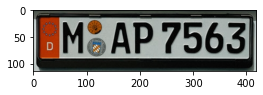

/content/dataset/es344.jpg


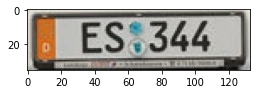

/content/dataset/bn158-58.jpg


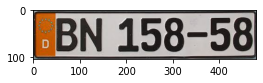

/content/dataset/blam414.jpg


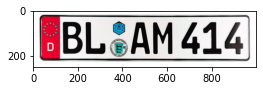

/content/dataset/smc9348.jpg


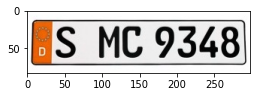

/content/dataset/wobnp301.jpg


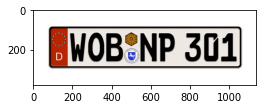

/content/dataset/pg589g.jpg


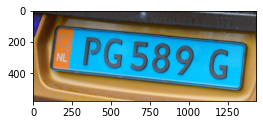

/content/dataset/qlgx125.jpg


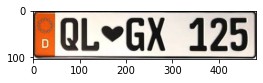

/content/dataset/mbcl600.jpg


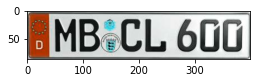

/content/dataset/slsc56.jpg


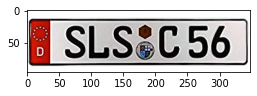

/content/dataset/spo7211.jpg


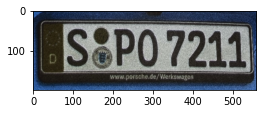

/content/dataset/mbdt781.jpg


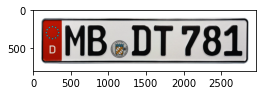

/content/dataset/brl702.jpg


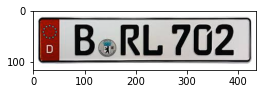

/content/dataset/wanne685.jpg


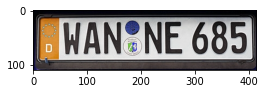

/content/dataset/wobvr142.jpg


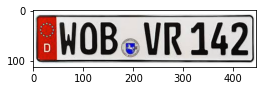

In [80]:
for path in image_list:
  print(path)
  img = cv2.imread(path)
  plt.figure(figsize=(4,6))
  plt.imshow(img)
  plt.show()